In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv("CustomerReview_Amazon_Dataset.csv")

In [3]:
#Data Preprocessing 

#Step 1: Drop unnecessary columns
columns_to_drop = ['dateAdded', 'dateUpdated', 'asins', 'imageURLs', 'keys', 'manufacturerNumber', 'reviews.date', 'reviews.dateSeen', 'reviews.id', 'reviews.sourceURLs', 'sourceURLs']
cols_drop = ['brand', 'categories','manufacturer','reviews.username']
df.drop(columns=cols_drop, inplace=True)

In [4]:
#Data preprocessing Step 2: Lookout for null values
df.isnull().sum()


id                         0
dateAdded                  0
dateUpdated                0
name                       0
asins                      0
primaryCategories          0
imageURLs                  0
keys                       0
manufacturerNumber         0
reviews.date               0
reviews.dateSeen           0
reviews.didPurchase    28323
reviews.doRecommend    12246
reviews.id             28291
reviews.numHelpful     12217
reviews.rating             0
reviews.sourceURLs         0
reviews.text               0
reviews.title              0
sourceURLs                 0
dtype: int64

In [5]:
#Removing columns with most number of null values 
cols_null_values = ['reviews.didPurchase','reviews.doRecommend','reviews.numHelpful']
df.drop(columns=cols_null_values, inplace=True)

In [6]:
#Data preprocessing step 3: Clean text --convert all text to lowercase, remove special characters
def clean_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    return text

df['clean_text'] = df['reviews.text'].apply(clean_text)

In [7]:
#Data Preprocessing Step 4: Removing Stop words and word tokenization

nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

df['clean_text'] = df['clean_text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\meruv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\meruv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
#Data Preprocessing Step 5: Lemmetization
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)

df['clean_text'] = df['clean_text'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\meruv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
#Sentimental Analysis

#Naive Bayes Classifier

# Splitting the dataset into training and testing sets
X = df['clean_text']
y = df['reviews.rating']  # Assuming 'reviews.rating' is the target variable

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorization (converting text data to numerical data)
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Training the model
classifier = MultinomialNB()  
classifier.fit(X_train_vectorized, y_train)

# Making predictions
y_pred = classifier.predict(X_test_vectorized)


In [11]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

C:\Users\meruv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.725604376213164
Precision: 0.7019082886894427
Recall: 0.725604376213164
F1-score: 0.6363180697114832

Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.10      0.18       185
           2       0.00      0.00      0.00       140
           3       1.00      0.00      0.01       254
           4       0.60      0.11      0.19      1093
           5       0.73      0.99      0.84      3995

    accuracy                           0.73      5667
   macro avg       0.63      0.24      0.24      5667
weighted avg       0.70      0.73      0.64      5667


Confusion Matrix:
[[  19    0    0   10  156]
 [   4    0    0   12  124]
 [   0    0    1   34  219]
 [   0    0    0  124  969]
 [   0    0    0   27 3968]]


C:\Users\meruv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\meruv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\meruv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
#Model: SVM

# Splitting the dataset into training and testing sets
X = df['clean_text']
y = df['reviews.rating']  # Assuming 'reviews.rating' is the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorization (converting text data to numerical data)
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Training the model
classifier = SVC(kernel='linear', random_state=42)  # You can also try other kernels like 'rbf'
classifier.fit(X_train_vectorized, y_train)

# Making predictions
y_pred = classifier.predict(X_test_vectorized)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

NameError: name 'SVC' is not defined

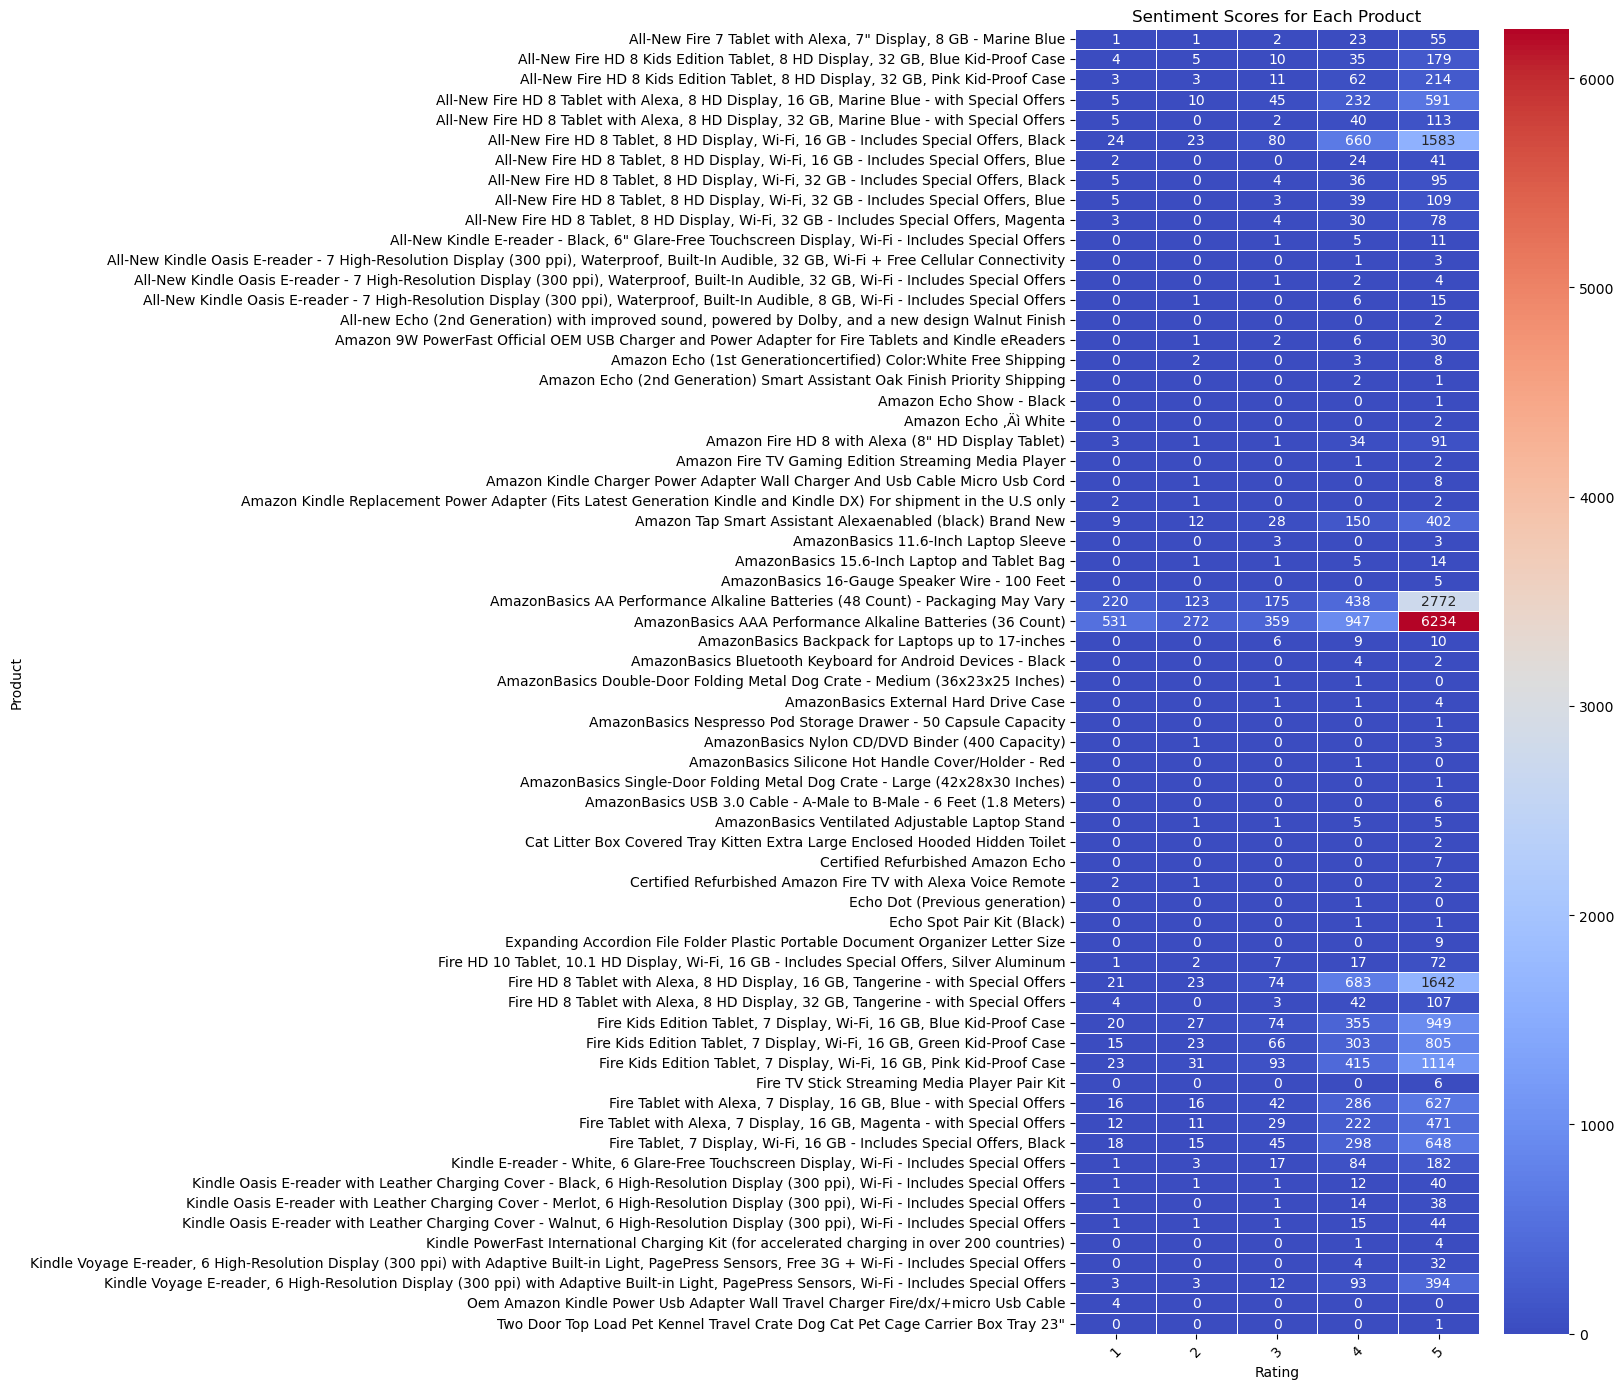

In [48]:
#Data Visualization

import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the data to create a matrix of ratings for each product
pivot_df = df.pivot_table(index='name', columns='reviews.rating', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(pivot_df, cmap='coolwarm', annot=True, fmt='d', linewidths=0.5)
plt.title('Sentiment Scores for Each Product')
plt.xlabel('Rating')
plt.ylabel('Product')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [60]:
pip install textblob



  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ------------ --------------------------- 194.6/626.3 kB 5.9 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 9.8 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 6.6 MB/s eta 0:00:00


In [65]:
from collections import Counter
import pandas as pd
from textblob import TextBlob  

# Define function to analyze sentiment
def analyze_sentiment(text):
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0.2:
        return 'Positive'
    elif sentiment < -0.2:
        return 'Negative'
    else:
        return 'Neutral'

# Define function to analyze compliments and complaints
def analyze_compliments_complaints(product_reviews):
    compliments = []
    complaints = []

    for index, review in product_reviews.iterrows():
        sentiment = analyze_sentiment(review['clean_text'])
        if sentiment == 'Positive':
            compliments.append(review['clean_text'])
        elif sentiment == 'Negative':
            complaints.append(review['clean_text'])

    # Concatenate compliments and complaints into single sentences
    compliments_sentence = ". ".join(compliments[:5])
    complaints_sentence = ". ".join(complaints[:5])

    return compliments_sentence, complaints_sentence

# Define function to analyze product overall sentiment
def analyze_product_sentiment(all_reviews):
    sentiments = [analyze_sentiment(review) for review in all_reviews]
    sentiment_counts = Counter(sentiments)
    return sentiment_counts

# Extract insights for each product
for product in df['name'].unique():
    product_reviews = df[df['name'] == product]
    all_reviews = product_reviews['clean_text']
    compliments, complaints = analyze_compliments_complaints(product_reviews)
    
    # Analyze compliments and complaints
    print("----------------------------------------------------------------------------------------------------------")
    print(f"Product: {product}")
    print("Compliments:")
    print(compliments)
    print("\nComplaints:")
    print(complaints)
    print("\nOverall Product Sentiment:")
    print(analyze_product_sentiment(all_reviews))


-----------------------------------------------------------------------------------
Product: AmazonBasics AAA Performance Alkaline Batteries (36 Count)
Compliments:
well duracell price happy. seem work well name brand battery much better price. battery long lasting price great. bought lot battery christmas amazonbasics cell good havent noticed difference brand name battery amazon basic brand lot easier purchase arrive house hand buy. well looking cheap nonrechargeable battery last quite perfect nothing say

Complaints:
order one item bad quality missing backup spring put pc aluminum make battery work. bulk always le expensive way go product like. seemed last long name brand name disappointed. sorry say ive disappointed didnt last long remote rc transmitter even store brand alkaline battery. use indoor flameless candle even dont last longa little disappointed

Overall Product Sentiment:
Counter({'Positive': 5030, 'Neutral': 3101, 'Negative': 212})
---------------------------------------

In [66]:
from collections import Counter
import pandas as pd
from textblob import TextBlob

# Define function to extract positive words from compliments and negative words from complaints
def extract_positive_negative_words(product_reviews):
    positive_words = []
    negative_words = []

    for index, review in product_reviews.iterrows():
        sentiment = TextBlob(review['clean_text']).sentiment.polarity
        words = review['clean_text'].split()
        if sentiment > 0.2:  # Positive sentiment
            positive_words.extend(words)
        elif sentiment < -0.2:  # Negative sentiment
            negative_words.extend(words)

    # Count occurrences of each word
    positive_word_counts = Counter(positive_words)
    negative_word_counts = Counter(negative_words)

    # Get the most positive words and most negative words
    most_positive_words = set([word for word, count in positive_word_counts.most_common(10)])
    most_negative_words = set([word for word, count in negative_word_counts.most_common(10)])

    return most_positive_words, most_negative_words

# Extract compliments and complaints
for product in df['name'].unique():
    product_reviews = df[df['name'] == product]
    compliments, complaints = extract_positive_negative_words(product_reviews)
    
    print(f"Product: {product}")
    print("Compliments (Positive Words):", compliments)
    print("Complaints (Negative Words):", complaints)
    print()


Product: AmazonBasics AAA Performance Alkaline Batteries (36 Count)
Compliments (Positive Words): {'amazon', 'good', 'last', 'work', 'battery', 'great', 'value', 'price', 'product', 'brand'}
Complaints (Negative Words): {'bad', 'dont', 'worst', 'use', 'last', 'work', 'battery', 'amazon', 'ever', 'brand'}

Product: AmazonBasics Nylon CD/DVD Binder (400 Capacity)
Compliments (Positive Words): {'lot', 'case', 'cd', 'keep', 'great', 'love', 'place', 'husband', 'everything', 'hold'}
Complaints (Negative Words): set()

Product: Amazon Echo ‚Äì White
Compliments (Positive Words): {'functionality', 'got', 'sound', 'pro', 'impressive', 'every', 'nd', 'con', 'gen', 'much'}
Complaints (Negative Words): set()

Product: Amazon Echo Show - Black
Compliments (Positive Words): {'one', 'watch', 'sale', 'pro', 'series', 'love', 'camera', 'alexa', 'get', 'went'}
Complaints (Negative Words): set()

Product: Echo Spot Pair Kit (Black)
Compliments (Positive Words): {'item', 'wanted', 'even', 'alexa', 'sure'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob  # Import TextBlob for sentiment analysis

# Load your dataset here
# Assuming you already have your dataset loaded as df

# Define function to analyze sentiment
def analyze_sentiment(text):
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0.2:
        return 'Positive'
    elif sentiment < -0.2:
        return 'Negative'
    else:
        return 'Neutral'

# Define function to analyze compliments and complaints
def analyze_compliments_complaints(product_reviews):
    compliments = []
    complaints = []

    for index, review in product_reviews.iterrows():
        sentiment = analyze_sentiment(review['clean_text'])
        if sentiment == 'Positive':
            compliments.append(review['clean_text'])
        elif sentiment == 'Negative':
            complaints.append(review['clean_text'])

    return compliments, complaints

# Define function to analyze product overall sentiment
def analyze_product_sentiment(all_reviews):
    sentiments = [analyze_sentiment(review) for review in all_reviews]
    sentiment_counts = Counter(sentiments)
    return sentiment_counts

# Define function to analyze key topics using LDA
def analyze_key_topics(reviews):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(reviews)
    lda = LatentDirichletAllocation(n_components=5, random_state=42)
    lda.fit(tfidf_matrix)
    return lda, vectorizer

# Extract insights for each product
for product in df['name'].unique():
    product_reviews = df[df['name'] == product]
    all_reviews = product_reviews['clean_text']
    compliments, complaints = analyze_compliments_complaints(product_reviews)
    
    # Analyze compliments and complaints
    print(f"Product: {product}")
    print("Compliments:")
    for compliment in compliments[:5]:
        print(compliment)
    print("\nComplaints:")
    for complaint in complaints[:5]:
        print(complaint)
    print("\nOverall Product Sentiment:")
    print(analyze_product_sentiment(all_reviews))
    
    # Analyze key topics
    lda, vectorizer = analyze_key_topics(all_reviews)
    feature_names = vectorizer.get_feature_names_out()
    print("\nKey Topics:")
    for topic_idx, topic in enumerate(lda.components_):
        print(f"Topic {topic_idx + 1}:")
        top_words_idx = topic.argsort()[:-10 - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        print(top_words)


In [70]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

# Define function to analyze sentiment
def analyze_sentiment(text):
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0.2:
        return 'Positive'
    elif sentiment < -0.2:
        return 'Negative'
    else:
        return 'Neutral'
    
# Define function to analyze key topics using LDA
def analyze_key_topics(reviews):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(reviews)
    lda = LatentDirichletAllocation(n_components=5, random_state=42)
    lda.fit(tfidf_matrix)
    return lda, vectorizer

# Generate output for each product
for product in df['name'].unique():
    product_reviews = df[df['name'] == product]
    all_reviews = product_reviews['reviews.text']

    # 1. Summary of Product Reviews
    total_reviews = len(all_reviews)
    average_rating = product_reviews['reviews.rating'].mean()
    rating_distribution = product_reviews['reviews.rating'].value_counts(normalize=True) * 100

    # 2. Sentiment Analysis
    sentiments = [analyze_sentiment(review) for review in all_reviews]
    sentiment_counts = Counter(sentiments)
    positive_percentage = sentiment_counts['Positive'] / total_reviews * 100
    neutral_percentage = sentiment_counts['Neutral'] / total_reviews * 100
    negative_percentage = sentiment_counts['Negative'] / total_reviews * 100

    # Print output for the product
    print("--------------------------------------------------------------------------------------------------------------")
    print(f"Product: Analyzing Customer Feedback for {product}\n")
    print("## 1. Summary of Product Reviews")
    print(f"- Total number of reviews: {total_reviews}")
    print(f"- Average rating: {average_rating:.2f}")
    print("- Distribution of ratings:")
    for rating, percentage in rating_distribution.iteritems():
        print(f"  - {rating} stars: {percentage:.2f}%")

    print("\n## 2. Sentiment Analysis")
    print("- Overall sentiment:")
    print(f"  - Positive: {positive_percentage:.2f}%")
    print(f"  - Neutral: {neutral_percentage:.2f}%")
    print(f"  - Negative: {negative_percentage:.2f}%")

    print("\n## 3. Key Topics")
     # 3. Key Topics
    lda, vectorizer = analyze_key_topics(all_reviews)
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda.components_):
        print(f"Topic {topic_idx + 1}:")
        top_words_idx = topic.argsort()[:-10 - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        print(top_words)

--------------------------------------------------------------------------------------------------------------
Product: Analyzing Customer Feedback for AmazonBasics AAA Performance Alkaline Batteries (36 Count)

## 1. Summary of Product Reviews
- Total number of reviews: 8343
- Average rating: 4.45
- Distribution of ratings:
  - 5 stars: 74.72%
  - 4 stars: 11.35%
  - 1 stars: 6.36%
  - 3 stars: 4.30%
  - 2 stars: 3.26%

## 2. Sentiment Analysis
- Overall sentiment:
  - Positive: 60.67%
  - Neutral: 37.04%
  - Negative: 2.29%

## 3. Key Topics


C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():


Topic 1:
['value', 'batteries', 'great', 'buy', 'love', 'amazon', 'nice', 'price', 'long', 'brand']
Topic 2:
['great', 'price', 'work', 'batteries', 'product', 'good', 'quality', 'beat', 'perfect', 'thanks']
Topic 3:
['excellent', 'expected', 'described', 'advertised', 'awesome', 'worked', 'item', 'say', 'product', 'delivery']
Topic 4:
['long', 'batteries', 'works', 'good', 'far', 'brands', 'just', 'cheap', 'lasting', 'don']
Topic 5:
['good', 'deal', 'price', 'batteries', 'ok', 'fine', 'great', 'battery', 'buy', 'work']
--------------------------------------------------------------------------------------------------------------
Product: Analyzing Customer Feedback for AmazonBasics Nylon CD/DVD Binder (400 Capacity)

## 1. Summary of Product Reviews
- Total number of reviews: 4
- Average rating: 4.25
- Distribution of ratings:
  - 5 stars: 75.00%
  - 2 stars: 25.00%

## 2. Sentiment Analysis
- Overall sentiment:
  - Positive: 25.00%
  - Neutral: 75.00%
  - Negative: 0.00%

## 3. Key To

C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():
C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():
C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():
C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():
C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iterit

--------------------------------------------------------------------------------------------------------------
Product: Analyzing Customer Feedback for AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary

## 1. Summary of Product Reviews
- Total number of reviews: 3728
- Average rating: 4.45
- Distribution of ratings:
  - 5 stars: 74.36%
  - 4 stars: 11.75%
  - 1 stars: 5.90%
  - 3 stars: 4.69%
  - 2 stars: 3.30%

## 2. Sentiment Analysis
- Overall sentiment:
  - Positive: 61.78%
  - Neutral: 35.43%
  - Negative: 2.79%

## 3. Key Topics


C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():


Topic 1:
['batteries', 'long', 'just', 'good', 'work', 'brand', 'brands', 'far', 'love', 'price']
Topic 2:
['great', 'good', 'price', 'batteries', 'value', 'work', 'deal', 'excellent', 'product', 'buy']
Topic 3:
['ok', 'described', 'batteries', 'say', 'affordable', 'worked', 'time', 'box', 'stuff', 'arrived']
Topic 4:
['works', 'expected', 'nice', 'cheap', 'perfect', 'advertised', 'fast', 'great', 'batteries', 'super']
Topic 5:
['beat', 'thank', 'awesome', 'happy', 'price', 'bargain', 'issues', 'batteries', 'amazing', 'doesn']
--------------------------------------------------------------------------------------------------------------
Product: Analyzing Customer Feedback for AmazonBasics Ventilated Adjustable Laptop Stand

## 1. Summary of Product Reviews
- Total number of reviews: 12
- Average rating: 4.17
- Distribution of ratings:
  - 5 stars: 41.67%
  - 4 stars: 41.67%
  - 2 stars: 8.33%
  - 3 stars: 8.33%

## 2. Sentiment Analysis
- Overall sentiment:
  - Positive: 25.00%
  - Neu

C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():
C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():
C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():
C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():
C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iterit

Topic 1:
['takes', 'smaller', 'sized', 'replaced', 'like', 'large', 'kitty', 'easy', 'clean', 'cat']
Topic 2:
['litter', 'box', 'takes', 'smaller', 'sized', 'replaced', 'like', 'large', 'kitty', 'easy']
Topic 3:
['takes', 'smaller', 'sized', 'replaced', 'like', 'large', 'kitty', 'easy', 'clean', 'cat']
Topic 4:
['takes', 'smaller', 'sized', 'replaced', 'like', 'large', 'kitty', 'easy', 'clean', 'cat']
Topic 5:
['value', 'price', 'great', 'good', 'takes', 'smaller', 'sized', 'replaced', 'like', 'large']
--------------------------------------------------------------------------------------------------------------
Product: Analyzing Customer Feedback for Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders

## 1. Summary of Product Reviews
- Total number of reviews: 39
- Average rating: 4.67
- Distribution of ratings:
  - 5 stars: 76.92%
  - 4 stars: 15.38%
  - 3 stars: 5.13%
  - 2 stars: 2.56%

## 2. Sentiment Analysis
- Overall sentiment:
 

C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():
C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():
C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():
C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():
C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iterit

--------------------------------------------------------------------------------------------------------------
Product: Analyzing Customer Feedback for Amazon Tap Smart Assistant Alexaenabled (black) Brand New

## 1. Summary of Product Reviews
- Total number of reviews: 601
- Average rating: 4.54
- Distribution of ratings:
  - 5 stars: 66.89%
  - 4 stars: 24.96%
  - 3 stars: 4.66%
  - 2 stars: 2.00%
  - 1 stars: 1.50%

## 2. Sentiment Analysis
- Overall sentiment:
  - Positive: 78.54%
  - Neutral: 20.30%
  - Negative: 1.16%

## 3. Key Topics


C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():


Topic 1:
['great', 'love', 'use', 'speaker', 'easy', 'tap', 'echo', 'sound', 'gift', 'alexa']
Topic 2:
['echo', 'tap', 'great', 'sound', 'alexa', 'speaker', 'good', 'price', 'use', 'voice']
Topic 3:
['use', 'echo', 'tap', 'speaker', 'play', 'sound', 'just', 'music', 'amazon', 'alexa']
Topic 4:
['great', 'love', 'good', 'sound', 'product', 'tap', 'recommend', 'alexa', 'speaker', 'echo']
Topic 5:
['tap', 'great', 'amazon', 'sound', 'love', 'alexa', 'speaker', 'echo', 'works', 'time']
--------------------------------------------------------------------------------------------------------------
Product: Analyzing Customer Feedback for All-New Kindle E-reader - Black, 6" Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers

## 1. Summary of Product Reviews
- Total number of reviews: 17
- Average rating: 4.59
- Distribution of ratings:
  - 5 stars: 64.71%
  - 4 stars: 29.41%
  - 3 stars: 5.88%

## 2. Sentiment Analysis
- Overall sentiment:
  - Positive: 70.59%
  - Neutral: 29.41%


C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():
C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():
C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():
C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():
C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iterit

--------------------------------------------------------------------------------------------------------------
Product: Analyzing Customer Feedback for Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers

## 1. Summary of Product Reviews
- Total number of reviews: 505
- Average rating: 4.73
- Distribution of ratings:
  - 5 stars: 78.02%
  - 4 stars: 18.42%
  - 3 stars: 2.38%
  - 1 stars: 0.59%
  - 2 stars: 0.59%

## 2. Sentiment Analysis
- Overall sentiment:
  - Positive: 75.05%
  - Neutral: 24.36%
  - Negative: 0.59%

## 3. Key Topics


C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():


Topic 1:
['kindle', 'love', 'voyage', 'new', 'great', 'light', 'screen', 'use', 'read', 'reader']
Topic 2:
['great', 'easy', 'reading', 'kindle', 'light', 'use', 'voyage', 'books', 'love', 'read']
Topic 3:
['kindle', 'reading', 'better', 'battery', 'nice', 'life', 'paperwhite', 'happy', 'light', 'books']
Topic 4:
['kindle', 'great', 'best', 'love', 'product', 'light', 'reader', 'reading', 'voyage', 'wife']
Topic 5:
['easy', 'light', 'read', 'kindle', 'love', 'like', 'use', 'recommend', 'reader', 'page']
--------------------------------------------------------------------------------------------------------------
Product: Analyzing Customer Feedback for AmazonBasics Nespresso Pod Storage Drawer - 50 Capsule Capacity

## 1. Summary of Product Reviews
- Total number of reviews: 1
- Average rating: 5.00
- Distribution of ratings:
  - 5 stars: 100.00%

## 2. Sentiment Analysis
- Overall sentiment:
  - Positive: 100.00%
  - Neutral: 0.00%
  - Negative: 0.00%

## 3. Key Topics
Topic 1:
['work

C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():
C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():
C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():


--------------------------------------------------------------------------------------------------------------
Product: Analyzing Customer Feedback for All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black

## 1. Summary of Product Reviews
- Total number of reviews: 2370
- Average rating: 4.58
- Distribution of ratings:
  - 5 stars: 66.79%
  - 4 stars: 27.85%
  - 3 stars: 3.38%
  - 1 stars: 1.01%
  - 2 stars: 0.97%

## 2. Sentiment Analysis
- Overall sentiment:
  - Positive: 76.20%
  - Neutral: 23.00%
  - Negative: 0.80%

## 3. Key Topics


C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():


Topic 1:
['price', 'recommend', 'great', 'tablet', 'happy', 'purchased', 'best', 'love', 'use', 'kindle']
Topic 2:
['bought', 'love', 'loves', 'gift', 'great', 'christmas', 'old', 'kindle', 'mom', 'got']
Topic 3:
['kindle', 'pleased', 'bought', 'law', 'loves', 'new', 'great', 'really', 'upgrade', 'purchased']
Topic 4:
['tablet', 'great', 'use', 'good', 'easy', 'price', 'love', 'amazon', 'size', 'screen']
Topic 5:
['web', 'amazon', 'tablet', 'surfing', 'internet', 'great', 'books', 'reading', 'games', 'screen']
--------------------------------------------------------------------------------------------------------------
Product: Analyzing Customer Feedback for Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case

## 1. Summary of Product Reviews
- Total number of reviews: 1676
- Average rating: 4.53
- Distribution of ratings:
  - 5 stars: 66.47%
  - 4 stars: 24.76%
  - 3 stars: 5.55%
  - 2 stars: 1.85%
  - 1 stars: 1.37%

## 2. Sentiment Analysis
- Overall sentiment:
 

C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():


Topic 1:
['son', 'times', 'great', 'tablet', 'slow', 'apps', 'easy', 'use', 'little', 'year']
Topic 2:
['good', 'buy', 'little', 'setting', 'best', 'beginner', 'tablet', 'limit', 'time', 'helpful']
Topic 3:
['wonderful', 'colors', 'proof', 'charging', 'quality', 'kids', 'toddlers', 'previous', 'tablet', 'port']
Topic 4:
['great', 'kids', 'tablet', 'love', 'use', 'easy', 'learning', 'games', 'apps', 'good']
Topic 5:
['loves', 'tablet', 'old', 'bought', 'year', 'great', 'love', 'kids', 'easy', 'daughter']
--------------------------------------------------------------------------------------------------------------
Product: Analyzing Customer Feedback for All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta

## 1. Summary of Product Reviews
- Total number of reviews: 115
- Average rating: 4.57
- Distribution of ratings:
  - 5 stars: 67.83%
  - 4 stars: 26.09%
  - 3 stars: 3.48%
  - 1 stars: 2.61%

## 2. Sentiment Analysis
- Overall sentiment:
  - Positiv

C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():


Topic 1:
['easy', 'love', 'tablet', 'apps', 'use', 'kindle', 'loves', 'read', 'kindles', 'product']
Topic 2:
['books', 'tablet', 'read', 'purchased', 'kindle', 'reading', 'great', 'bought', 'love', 'hd']
Topic 3:
['amazon', 'wife', 'bought', 'price', 'unit', 'value', 'awesome', 'beat', 'having', 'fundraiser']
Topic 4:
['great', 'easy', 'recommend', 'product', 'memory', 'tablet', 'games', 'use', 'apps', 'size']
Topic 5:
['tablet', 'good', 'kindle', 'games', 'new', 'ipad', 'amazon', 'low', 'app', 'nice']
--------------------------------------------------------------------------------------------------------------
Product: Analyzing Customer Feedback for All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Black

## 1. Summary of Product Reviews
- Total number of reviews: 140
- Average rating: 4.54
- Distribution of ratings:
  - 5 stars: 67.86%
  - 4 stars: 25.71%
  - 1 stars: 3.57%
  - 3 stars: 2.86%

## 2. Sentiment Analysis
- Overall sentiment:
  - Positive: 

C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():


Topic 1:
['tablet', 'easy', 'good', 'works', 'love', 'kindle', 'navigate', 'just', 'read', 'internet']
Topic 2:
['great', 'love', 'big', 'kindle', 'device', 'amazon', 'bought', 'tablet', 'faster', 'old']
Topic 3:
['use', 'tablet', 'love', 'easy', 'purchased', 'gift', 'light', 'does', 'like', 'books']
Topic 4:
['easy', 'nice', 'use', 'loves', 'good', 'great', 'bought', 'ipad', 'second', 'product']
Topic 5:
['great', 'kindle', 'books', 'amazon', 'tablet', 'apps', 'read', 'love', 'really', 'screen']
--------------------------------------------------------------------------------------------------------------
Product: Analyzing Customer Feedback for Kindle Oasis E-reader with Leather Charging Cover - Black, 6 High-Resolution Display (300 ppi), Wi-Fi - Includes Special Offers

## 1. Summary of Product Reviews
- Total number of reviews: 55
- Average rating: 4.62
- Distribution of ratings:
  - 5 stars: 72.73%
  - 4 stars: 21.82%
  - 1 stars: 1.82%
  - 3 stars: 1.82%
  - 2 stars: 1.82%

## 2. 

C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():
C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():


Topic 1:
['light', 'kindle', 'looking', 'ebook', 'oasis', 'beginner', 'paperwhite', 'great', 'did', 'really']
Topic 2:
['wife', 'voyage', 'original', 'case', 'reads', 'using', 'battery', 'lot', 'device', 'reading']
Topic 3:
['easy', 'light', 'kindle', 'love', 'cover', 'reading', 'reader', 'convenient', 'great', 'remember']
Topic 4:
['kindle', 'life', 'battery', 'make', 'lightweight', 'nice', 'best', 'reading', 'bestbuy', 'actually']
Topic 5:
['kindle', 'gift', 'item', 'oasis', 'easier', 'cover', 'kindles', 'makes', 'old', 'fantastic']
--------------------------------------------------------------------------------------------------------------
Product: Analyzing Customer Feedback for Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Free 3G + Wi-Fi - Includes Special Offers

## 1. Summary of Product Reviews
- Total number of reviews: 36
- Average rating: 4.89
- Distribution of ratings:
  - 5 stars: 88.89%
  - 4 stars: 11.11%

#

C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():


Topic 1:
['great', 'games', 'tablet', 'gift', 'good', 'reading', 'bought', 'sale', 'play', 'excellent']
Topic 2:
['tablet', 'kids', 'great', 'perfect', 'use', 'awsome', 'amazon', 'looking', 'price', 'youtube']
Topic 3:
['bought', 'buy', 'memory', 'quality', 'got', 'gifts', 'good', 'loved', 'value', 'apps']
Topic 4:
['like', 'great', 'tablet', 'price', 'good', 'grandson', 'just', 'son', 'loves', 'christmas']
Topic 5:
['love', 'loves', 'easy', 'use', 'purchased', 'gift', 'old', 'year', 'child', 'kids']
--------------------------------------------------------------------------------------------------------------
Product: Analyzing Customer Feedback for Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black

## 1. Summary of Product Reviews
- Total number of reviews: 1024
- Average rating: 4.51
- Distribution of ratings:
  - 5 stars: 63.28%
  - 4 stars: 29.10%
  - 3 stars: 4.39%
  - 1 stars: 1.76%
  - 2 stars: 1.46%

## 2. Sentiment Analysis
- Overall sentiment:
  - Positive

C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():


Topic 1:
['tablet', 'great', 'good', 'amazon', 'product', 'reader', 'replacement', 'kindle', 'item', 'reading']
Topic 2:
['tablet', 'loves', 'great', 'bought', 'use', 'gift', 'price', 'old', 'good', 'love']
Topic 3:
['better', 'tablet', 'works', 'love', 'great', 'kids', 'kindles', 'generation', 'use', 'travel']
Topic 4:
['great', 'easy', 'tablet', 'love', 'works', 'use', 'product', 'kindle', 'just', 'carry']
Topic 5:
['tablet', 'good', 'great', 'use', 'easy', 'product', 'excellent', 'bought', 'price', 'awesome']
--------------------------------------------------------------------------------------------------------------
Product: Analyzing Customer Feedback for All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Blue

## 1. Summary of Product Reviews
- Total number of reviews: 67
- Average rating: 4.52
- Distribution of ratings:
  - 5 stars: 61.19%
  - 4 stars: 35.82%
  - 1 stars: 2.99%

## 2. Sentiment Analysis
- Overall sentiment:
  - Positive: 82.09%
  - 

C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():
C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():


Topic 1:
['tablet', 'bought', 'loves', 'little', 'purchased', 'wife', 'nice', 'screen', 'amazon', 'read']
Topic 2:
['just', 'needed', 'buy', 'books', 'carry', 'purchase', 'good', 'product', 'great', 'law']
Topic 3:
['tablet', 'great', 'kindle', 'bought', 'amazon', 'got', 'video', 'works', 'quality', 'good']
Topic 4:
['easy', 'use', 'great', 'books', 'read', 'recommend', 'love', 'light', 'reading', 'download']
Topic 5:
['tablet', 'easy', 'love', 'great', 'use', 'kindle', 'apps', 'second', 'good', 'wanted']
--------------------------------------------------------------------------------------------------------------
Product: Analyzing Customer Feedback for Kindle Oasis E-reader with Leather Charging Cover - Merlot, 6 High-Resolution Display (300 ppi), Wi-Fi - Includes Special Offers

## 1. Summary of Product Reviews
- Total number of reviews: 54
- Average rating: 4.63
- Distribution of ratings:
  - 5 stars: 70.37%
  - 4 stars: 25.93%
  - 1 stars: 1.85%
  - 3 stars: 1.85%

## 2. Sentiment

C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():
C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():


--------------------------------------------------------------------------------------------------------------
Product: Analyzing Customer Feedback for Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Silver Aluminum

## 1. Summary of Product Reviews
- Total number of reviews: 99
- Average rating: 4.59
- Distribution of ratings:
  - 5 stars: 72.73%
  - 4 stars: 17.17%
  - 3 stars: 7.07%
  - 2 stars: 2.02%
  - 1 stars: 1.01%

## 2. Sentiment Analysis
- Overall sentiment:
  - Positive: 72.73%
  - Neutral: 27.27%
  - Negative: 0.00%

## 3. Key Topics
Topic 1:
['games', 'kindle', 'use', 'tablet', 'web', 'year', 'books', 'easy', 'just', 'everyday']
Topic 2:
['love', 'use', 'great', 'easy', 'kindle', 'good', 'recommend', 'screen', 'size', 'best']
Topic 3:
['love', 'tablet', 'watch', 'kindle', 'graphics', 'new', 'beautiful', 'likes', 'capabilities', 'screen']
Topic 4:
['great', 'ipad', 'gift', 'tablet', 'super', 'happy', 'loves', 'price', 'sound', 'wife']
Topic 5:
[

C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():
C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():
C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():
C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():


Topic 1:
['great', 'tablet', 'product', 'kindle', 'said', 'daughter', 'gift', 'does', 'recommend', 'hd']
Topic 2:
['great', 'love', 'tablet', 'bought', 'amazon', 'use', 'really', 'value', 'loves', 'just']
Topic 3:
['good', 'tablet', 'easy', 'great', 'works', 'use', 'gift', 'hit', 'item', 'fast']
Topic 4:
['games', 'books', 'use', 'watching', 'loves', 'love', 'movies', 'tablet', 'play', 'read']
Topic 5:
['great', 'price', 'bought', 'product', 'tablet', 'easy', 'loves', 'value', 'read', 'buy']
--------------------------------------------------------------------------------------------------------------
Product: Analyzing Customer Feedback for AmazonBasics Single-Door Folding Metal Dog Crate - Large (42x28x30 Inches)

## 1. Summary of Product Reviews
- Total number of reviews: 1
- Average rating: 5.00
- Distribution of ratings:
  - 5 stars: 100.00%

## 2. Sentiment Analysis
- Overall sentiment:
  - Positive: 100.00%
  - Neutral: 0.00%
  - Negative: 0.00%

## 3. Key Topics
Topic 1:
['study

C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():


Topic 1:
['tablet', 'use', 'kids', 'love', 'daughter', 'fact', 'things', 'device', 'purchased', 'case']
Topic 2:
['kids', 'loves', 'great', 'easy', 'use', 'love', 'old', 'tablet', 'games', 'year']
Topic 3:
['loves', 'really', 'child', 'tablet', 'worked', 'daughter', 'äôt', 'kids', 'long', 'grandson']
Topic 4:
['needs', 'price', 'tablet', 'bought', 'got', 'loves', 'kid', 'break', 'like', 'mom']
Topic 5:
['tablet', 'son', 'great', 'loves', 'bought', 'kid', 'enjoyed', 'car', 'play', 'christmas']
--------------------------------------------------------------------------------------------------------------
Product: Analyzing Customer Feedback for All-New Fire HD 8 Kids Edition Tablet, 8 HD Display, 32 GB, Blue Kid-Proof Case

## 1. Summary of Product Reviews
- Total number of reviews: 233
- Average rating: 4.63
- Distribution of ratings:
  - 5 stars: 76.82%
  - 4 stars: 15.02%
  - 3 stars: 4.29%
  - 2 stars: 2.15%
  - 1 stars: 1.72%

## 2. Sentiment Analysis
- Overall sentiment:
  - Positiv

C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():


Topic 1:
['great', 'bought', 'loves', 'use', 'year', 'kids', 'tablet', 'old', 'love', 'easy']
Topic 2:
['tablet', 'good', 'loves', 'old', 'daughter', 'price', 'love', 'kid', 'year', 'case']
Topic 3:
['tablet', 'kids', 'loves', 'son', 'gift', 'great', 'best', 'tablets', 'year', 'old']
Topic 4:
['easy', 'use', 'love', 'loves', 'tablet', 'got', 'daughter', 'kids', 'durable', 'old']
Topic 5:
['tablet', 'love', 'great', 'kids', 'item', 'year', 'old', 'recommend', 'apps', 'best']
--------------------------------------------------------------------------------------------------------------
Product: Analyzing Customer Feedback for All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Marine Blue - with Special Offers

## 1. Summary of Product Reviews
- Total number of reviews: 883
- Average rating: 4.58
- Distribution of ratings:
  - 5 stars: 66.93%
  - 4 stars: 26.27%
  - 3 stars: 5.10%
  - 2 stars: 1.13%
  - 1 stars: 0.57%

## 2. Sentiment Analysis
- Overall sentiment:
  - Positive: 73.9

C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():


Topic 1:
['tablet', 'great', 'bought', 'loved', 'just', 'loves', 'easy', 'good', 'got', 'product']
Topic 2:
['good', 'great', 'kids', 'love', 'bought', 'use', 'value', 'kindle', 'price', 'work']
Topic 3:
['tablet', 'good', 'great', 'price', 'use', 'amazon', 'screen', 'love', 'gift', 'size']
Topic 4:
['great', 'tablet', 'kindle', 'price', 'use', 'daughter', 'loves', 'bought', 'perfect', 'love']
Topic 5:
['tablet', 'use', 'great', 'easy', 'games', 'love', 'price', 'play', 'works', 'books']
--------------------------------------------------------------------------------------------------------------
Product: Analyzing Customer Feedback for All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 32 GB, Marine Blue - with Special Offers

## 1. Summary of Product Reviews
- Total number of reviews: 160
- Average rating: 4.60
- Distribution of ratings:
  - 5 stars: 70.62%
  - 4 stars: 25.00%
  - 1 stars: 3.12%
  - 3 stars: 1.25%

## 2. Sentiment Analysis
- Overall sentiment:
  - Positive: 73.12%
  

C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():


Topic 1:
['great', 'tablet', 'just', 'apps', 'bought', 'kindle', 'wish', 'amazon', 'reading', 'easy']
Topic 2:
['tablet', 'bought', 'great', 'reading', 'new', 'äôs', 'kindle', 'use', 'love', 'amazon']
Topic 3:
['loves', 'good', 'easy', 'wife', 'happy', 'gift', 'tablet', 'daughter', 'bought', 'works']
Topic 4:
['great', 'use', 'kindle', 'easy', 'tablets', 'kids', 'tablet', 'new', 'love', 'amazon']
Topic 5:
['tablet', 'kindle', 'use', 'want', 'just', 'expensive', 'hd', 'tablets', 'good', 'amazon']
--------------------------------------------------------------------------------------------------------------
Product: Analyzing Customer Feedback for Fire Tablet with Alexa, 7 Display, 16 GB, Magenta - with Special Offers

## 1. Summary of Product Reviews
- Total number of reviews: 745
- Average rating: 4.52
- Distribution of ratings:
  - 5 stars: 63.22%
  - 4 stars: 29.80%
  - 3 stars: 3.89%
  - 1 stars: 1.61%
  - 2 stars: 1.48%

## 2. Sentiment Analysis
- Overall sentiment:
  - Positive: 73

C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():


Topic 1:
['great', 'tablet', 'love', 'good', 'product', 'price', 'bought', 'little', 'kids', 'easy']
Topic 2:
['tablet', 'great', 'use', 'love', 'easy', 'kindle', 'works', 'amazon', 'good', 'apps']
Topic 3:
['tablet', 'bought', 'loves', 'great', 'love', 'books', 'games', 'amazon', 'use', 'happy']
Topic 4:
['great', 'tablet', 'price', 'loves', 'bought', 'perfect', 'easy', 'use', 'old', 'year']
Topic 5:
['tablet', 'great', 'screen', 'good', 'reading', 'use', 'recommended', 'easy', 'kindle', 'sound']
--------------------------------------------------------------------------------------------------------------
Product: Analyzing Customer Feedback for Echo Dot (Previous generation)

## 1. Summary of Product Reviews
- Total number of reviews: 1
- Average rating: 4.00
- Distribution of ratings:
  - 4 stars: 100.00%

## 2. Sentiment Analysis
- Overall sentiment:
  - Positive: 100.00%
  - Neutral: 0.00%
  - Negative: 0.00%

## 3. Key Topics
Topic 1:
['won', 'weather', 'alarms', 'amazon', 'bigge

C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():


--------------------------------------------------------------------------------------------------------------
Product: Analyzing Customer Feedback for Fire Tablet with Alexa, 7 Display, 16 GB, Blue - with Special Offers

## 1. Summary of Product Reviews
- Total number of reviews: 987
- Average rating: 4.51
- Distribution of ratings:
  - 5 stars: 63.53%
  - 4 stars: 28.98%
  - 3 stars: 4.26%
  - 1 stars: 1.62%
  - 2 stars: 1.62%

## 2. Sentiment Analysis
- Overall sentiment:
  - Positive: 73.15%
  - Neutral: 25.03%
  - Negative: 1.82%

## 3. Key Topics


C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():


Topic 1:
['great', 'tablet', 'kindle', 'loves', 'books', 'price', 'purchase', 'bought', 'happy', 'good']
Topic 2:
['great', 'tablet', 'use', 'bought', 'price', 'easy', 'good', 'games', 'works', 'kids']
Topic 3:
['tablet', 'use', 'great', 'play', 'bought', 'old', 'got', 'year', 'loves', 'perfect']
Topic 4:
['gift', 'tablet', 'loved', 'good', 'great', 'gave', 'bought', 'use', 'granddaughter', 'product']
Topic 5:
['tablet', 'easy', 'love', 'use', 'great', 'kids', 'good', 'amazon', 'price', 'bought']
--------------------------------------------------------------------------------------------------------------
Product: Analyzing Customer Feedback for Kindle Oasis E-reader with Leather Charging Cover - Walnut, 6 High-Resolution Display (300 ppi), Wi-Fi - Includes Special Offers

## 1. Summary of Product Reviews
- Total number of reviews: 62
- Average rating: 4.61
- Distribution of ratings:
  - 5 stars: 70.97%
  - 4 stars: 24.19%
  - 1 stars: 1.61%
  - 3 stars: 1.61%
  - 2 stars: 1.61%

## 2.

C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():
C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():


--------------------------------------------------------------------------------------------------------------
Product: Analyzing Customer Feedback for Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case

## 1. Summary of Product Reviews
- Total number of reviews: 1425
- Average rating: 4.53
- Distribution of ratings:
  - 5 stars: 66.60%
  - 4 stars: 24.91%
  - 3 stars: 5.19%
  - 2 stars: 1.89%
  - 1 stars: 1.40%

## 2. Sentiment Analysis
- Overall sentiment:
  - Positive: 71.72%
  - Neutral: 27.09%
  - Negative: 1.19%

## 3. Key Topics


C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():


Topic 1:
['kids', 'tablet', 'great', 'love', 'use', 'good', 'price', 'parental', 'controls', 'year']
Topic 2:
['loves', 'year', 'tablet', 'grandkids', 'daughter', 'old', 'love', 'easy', 'granddaughter', 'perfect']
Topic 3:
['kids', 'easy', 'tablet', 'great', 'love', 'case', 'child', 'use', 'like', 'product']
Topic 4:
['great', 'kids', 'tablet', 'loves', 'good', 'games', 'keeps', 'learning', 'kid', 'apps']
Topic 5:
['loves', 'old', 'bought', 'great', 'tablet', 'year', 'christmas', 'grandson', 'son', 'gift']
--------------------------------------------------------------------------------------------------------------
Product: Analyzing Customer Feedback for Fire HD 8 Tablet with Alexa, 8 HD Display, 32 GB, Tangerine - with Special Offers

## 1. Summary of Product Reviews
- Total number of reviews: 156
- Average rating: 4.59
- Distribution of ratings:
  - 5 stars: 68.59%
  - 4 stars: 26.92%
  - 1 stars: 2.56%
  - 3 stars: 1.92%

## 2. Sentiment Analysis
- Overall sentiment:
  - Positive: 

C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():


Topic 1:
['easy', 'tablet', 'use', 'love', 'apps', 'purchased', 'great', 'kindle', 'recommend', 'needed']
Topic 2:
['great', 'tablet', 'easy', 'works', 'price', 'does', 'kids', 'perfect', 'ipad', 'kindle']
Topic 3:
['kindle', 'books', 'great', 'love', 'reading', 'loves', 'read', 'use', 'just', 'games']
Topic 4:
['little', 'games', 'bought', 'value', 'loves', 'tablet', 'love', 'nice', 'likes', 'great']
Topic 5:
['tablet', 'great', 'product', 'purchased', 'loves', 'size', 'good', 'kindle', 'christmas', 'memory']
--------------------------------------------------------------------------------------------------------------
Product: Analyzing Customer Feedback for Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case

## 1. Summary of Product Reviews
- Total number of reviews: 1212
- Average rating: 4.53
- Distribution of ratings:
  - 5 stars: 66.42%
  - 4 stars: 25.00%
  - 3 stars: 5.45%
  - 2 stars: 1.90%
  - 1 stars: 1.24%

## 2. Sentiment Analysis
- Overall sentiment:


C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():


Topic 1:
['great', 'learning', 'loves', 'tablet', 'kids', 'recommend', 'product', 'keeps', 'love', 'use']
Topic 2:
['christmas', 'love', 'kids', 'tablet', 'great', 'loves', 'year', 'bought', 'gift', 'grandson']
Topic 3:
['tablet', 'kids', 'loves', 'old', 'year', 'great', 'easy', 'love', 'games', 'daughter']
Topic 4:
['great', 'love', 'kids', 'apps', 'tablet', 'good', 'use', 'easy', 'nephew', 'loves']
Topic 5:
['loves', 'kids', 'niece', 'tablet', 'old', 'bought', 'year', 'granddaughter', 'durable', 'son']
--------------------------------------------------------------------------------------------------------------
Product: Analyzing Customer Feedback for Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers

## 1. Summary of Product Reviews
- Total number of reviews: 287
- Average rating: 4.54
- Distribution of ratings:
  - 5 stars: 63.41%
  - 4 stars: 29.27%
  - 3 stars: 5.92%
  - 2 stars: 1.05%
  - 1 stars: 0.35%

## 2. Sentiment Analysis
- Overall

C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():


Topic 1:
['kindle', 'easy', 'use', 'great', 'reading', 'read', 'light', 'love', 'bought', 'good']
Topic 2:
['great', 'reading', 'read', 'kindle', 'books', 'price', 'product', 'good', 'bought', 'gift']
Topic 3:
['easy', 'kindle', 'books', 'love', 'loved', 'use', 'weight', 'light', 'read', 'good']
Topic 4:
['great', 'love', 'good', 'kindle', 'long', 'screen', 'really', 'reading', 'deal', 'use']
Topic 5:
['reader', 'kindle', 'read', 'great', 'light', 'easy', 'like', 'books', 'use', 'paperwhite']
--------------------------------------------------------------------------------------------------------------
Product: Analyzing Customer Feedback for Amazon Fire TV Gaming Edition Streaming Media Player

## 1. Summary of Product Reviews
- Total number of reviews: 3
- Average rating: 4.67
- Distribution of ratings:
  - 5 stars: 66.67%
  - 4 stars: 33.33%

## 2. Sentiment Analysis
- Overall sentiment:
  - Positive: 100.00%
  - Neutral: 0.00%
  - Negative: 0.00%

## 3. Key Topics
Topic 1:
['works',

C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():
C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():
C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():
C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():
C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iterit

--------------------------------------------------------------------------------------------------------------
Product: Analyzing Customer Feedback for Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers

## 1. Summary of Product Reviews
- Total number of reviews: 2443
- Average rating: 4.60
- Distribution of ratings:
  - 5 stars: 67.21%
  - 4 stars: 27.96%
  - 3 stars: 3.03%
  - 2 stars: 0.94%
  - 1 stars: 0.86%

## 2. Sentiment Analysis
- Overall sentiment:
  - Positive: 76.95%
  - Neutral: 22.23%
  - Negative: 0.82%

## 3. Key Topics


C:\Users\meruv\AppData\Local\Temp\ipykernel_2756\1716951563.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rating, percentage in rating_distribution.iteritems():


Topic 1:
['price', 'tablet', 'great', 'good', 'reading', 'does', 'easy', 'use', 'value', 'love']
Topic 2:
['great', 'tablet', 'amazon', 'good', 'use', 'price', 'user', 'games', 'apps', 'kindle']
Topic 3:
['loves', 'old', 'bought', 'tablet', 'games', 'year', 'great', 'christmas', 'kindle', 'nice']
Topic 4:
['great', 'tablet', 'good', 'price', 'recommend', 'product', 'fast', 'highly', 'quality', 'nice']
Topic 5:
['tablet', 'use', 'easy', 'great', 'love', 'kindle', 'bought', 'price', 'gift', 'screen']
